In [1]:
%matplotlib inline 
%pylab inline 

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [9]:
train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [10]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            1  
4      0            373450   8.0500   NaN        S            0

In [11]:
variaveis = ['Sex_binario', 'Age']

In [12]:
X = train[variaveis]
y = train['Survived']

In [13]:
X.head()

Sex_binario   Age
0            0  22.0
1            1  38.0
2            1  26.0
3            1  35.0
4            0  35.0

In [14]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X = X.fillna(-1)

In [16]:
modelo.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [17]:
X_prev = test[variaveis]
X_prev = X_prev.fillna(-1)
X_prev.head()

Sex_binario   Age
0            0  34.5
1            1  47.0
2            0  62.0
3            0  27.0
4            1  22.0

In [18]:
p = modelo.predict(X_prev)
p

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Usando `train_test_split` para criar arquivos de treino e teste 

In [19]:
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [20]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [21]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [22]:
p = modelo.predict(X_valid)

In [23]:
y_valid == p

137     True
718     True
453     True
48      True
431     True
       ...  
243     True
804    False
447    False
212     True
254    False
Name: Survived, Length: 446, dtype: bool

In [24]:
acc = np.mean(y_valid == p)
acc

0.7511210762331838

In [25]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7937219730941704

In [26]:
(X_valid['Sex_binario'] == 1).astype(np.int64)

137    0
718    0
453    0
48     0
431    1
      ..
243    0
804    0
447    0
212    0
254    1
Name: Sex_binario, Length: 446, dtype: int64

In [27]:
(X_valid['Sex_binario'])

137    0
718    0
453    0
48     0
431    1
      ..
243    0
804    0
447    0
212    0
254    1
Name: Sex_binario, Length: 446, dtype: int64

# Métodos de reamostragem
#### Diminuindo a interferência da aleatoriedade no modelo
### Validação Cruzada

In [28]:
from sklearn.model_selection import RepeatedKFold

In [29]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)    
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados.append(acc)
    print("ACC:", acc)   
    print()

Treino: 445
Valid: 446
ACC: 0.7511210762331838

Treino: 446
Valid: 445
ACC: 0.7617977528089888

Treino: 445
Valid: 446
ACC: 0.7533632286995515

Treino: 446
Valid: 445
ACC: 0.7595505617977528

Treino: 445
Valid: 446
ACC: 0.7690582959641256

Treino: 446
Valid: 445
ACC: 0.7573033707865169

Treino: 445
Valid: 446
ACC: 0.7399103139013453

Treino: 446
Valid: 445
ACC: 0.7595505617977528

Treino: 445
Valid: 446
ACC: 0.7354260089686099

Treino: 446
Valid: 445
ACC: 0.797752808988764

Treino: 445
Valid: 446
ACC: 0.7690582959641256

Treino: 446
Valid: 445
ACC: 0.7640449438202247

Treino: 445
Valid: 446
ACC: 0.7757847533632287

Treino: 446
Valid: 445
ACC: 0.7573033707865169

Treino: 445
Valid: 446
ACC: 0.7556053811659192

Treino: 446
Valid: 445
ACC: 0.7640449438202247

Treino: 445
Valid: 446
ACC: 0.7443946188340808

Treino: 446
Valid: 445
ACC: 0.7595505617977528

Treino: 445
Valid: 446
ACC: 0.7533632286995515

Treino: 446
Valid: 445
ACC: 0.7640449438202247



In [30]:
np.mean(resultados)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

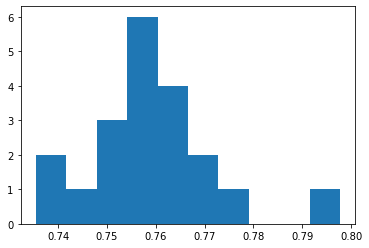

In [31]:
pylab.hist(resultados)

## Adicionando novas variáveis

In [32]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Sex_binario  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            1  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S            1  
4      0            373450   8.0500   NaN        S            0

In [33]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [34]:
X = train[variaveis].fillna(-1)
y = train['Survived']
X

Sex_binario   Age  Pclass  SibSp  Parch     Fare
0              0  22.0       3      1      0   7.2500
1              1  38.0       1      1      0  71.2833
2              1  26.0       3      0      0   7.9250
3              1  35.0       1      1      0  53.1000
4              0  35.0       3      0      0   8.0500
..           ...   ...     ...    ...    ...      ...
886            0  27.0       2      0      0  13.0000
887            1  19.0       1      0      0  30.0000
888            1  -1.0       3      1      2  23.4500
889            0  26.0       1      0      0  30.0000
890            0  32.0       3      0      0   7.7500

[891 rows x 6 columns]

In [35]:
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])
    
    X_treino , X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)    
    modelo.fit(X_treino, y_treino)
    
    p = modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    
    resultados.append(acc)
    print("ACC:", acc)   
    print()

Treino: 445
Valid: 446
ACC: 0.7869955156950673

Treino: 446
Valid: 445
ACC: 0.7797752808988764

Treino: 445
Valid: 446
ACC: 0.827354260089686

Treino: 446
Valid: 445
ACC: 0.8179775280898877

Treino: 445
Valid: 446
ACC: 0.7847533632286996

Treino: 446
Valid: 445
ACC: 0.7842696629213484

Treino: 445
Valid: 446
ACC: 0.8161434977578476

Treino: 446
Valid: 445
ACC: 0.7842696629213484

Treino: 445
Valid: 446
ACC: 0.8004484304932735

Treino: 446
Valid: 445
ACC: 0.8

Treino: 445
Valid: 446
ACC: 0.8183856502242153

Treino: 446
Valid: 445
ACC: 0.802247191011236

Treino: 445
Valid: 446
ACC: 0.8116591928251121

Treino: 446
Valid: 445
ACC: 0.8067415730337079

Treino: 445
Valid: 446
ACC: 0.820627802690583

Treino: 446
Valid: 445
ACC: 0.7887640449438202

Treino: 445
Valid: 446
ACC: 0.8385650224215246

Treino: 446
Valid: 445
ACC: 0.8044943820224719

Treino: 445
Valid: 446
ACC: 0.7982062780269058

Treino: 446
Valid: 445
ACC: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

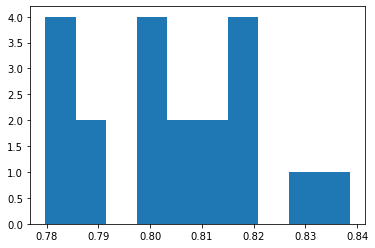

In [36]:
pylab.hist(resultados)

In [37]:
np.mean(resultados)

0.8041457147175896

## Retreinando o modelo com todos os dados
Retreinando com todos os dados

In [38]:
X.head()

Sex_binario   Age  Pclass  SibSp  Parch     Fare
0            0  22.0       3      1      0   7.2500
1            1  38.0       1      1      0  71.2833
2            1  26.0       3      0      0   7.9250
3            1  35.0       1      1      0  53.1000
4            0  35.0       3      0      0   8.0500

In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
#test[variaveis]

In [41]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)    
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

## Criando arquivo para submissão

In [42]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub

PassengerId
892     0
893     0
894     1
895     1
896     0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [43]:
sub.to_csv('modelo2.csv', header=True)